# Thermal Expansion for BB84 H gate for |+⟩

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_armonk')
backend.properties()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from qiskit.providers.aer.noise import thermal_relaxation_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import pauli_error

from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise
#import matplotlib.pyplot as plt

def make_noise_therm(T1,T2,time_measure):
    #T1 = 188610 # in nano second, 188.61 us
    #T2 = 191630 # in nano second, 191.63 us
    error_measure = thermal_relaxation_error(T1,T2,time_measure)
    noise_model = noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_measure, "measure")
    return noise_model



In [13]:
from qiskit.tools.monitor import backend_monitor
from qiskit import *
from qiskit.visualization import plot_histogram
from random import randrange, seed, sample
from sys import argv, exit
import random

y_list0=[]
y_list1=[]
#data = int(input('ENTER LENGTH OF BIT STREAM (example 5 For 10110):'))
for z in range(1):
    data=1001
    ##########################################################################
    h=1
    #h=int(input())
    def bit_stream(p):
        key1 = ""
        for i in range(p):
            temp = str(random.randint(h,h))
            key1 += temp
        return(key1)
    
    bitstream= bit_stream(data)
    digits = [int(x) for x in str(bitstream)]
    print(digits)
    ##########################################################################
    #print('List of Bit Stream to transfer over Quantum Channel')
    #print(digits)
    print('\n')
    #n = len(digits)
    bob_bits0=[]
    bob_bits1=[]
    ##########################################################################
    bob_bits=[]
    from random import choice
    m=0
    n=1001
    for i in range(n):
        m=m+1
        #print("No of identity Gate:",m)
        if digits[i] == 1:
            q = QuantumRegister(1, 'q')
            c = ClassicalRegister(1, 'c')
            qc = QuantumCircuit(q, c)
            qc.x(0)
            qc.barrier()
            qc.h(0)
            qc.barrier()
            qc.append(i1_gate, [0])
            qc.barrier()
            for j in range(100):
                #qc.delay(1,unit='s')
                qc.id(0)
                qc.barrier()
            #qc.h(0)
            #qc.barrier()
            qc.measure(q[0], c[0])
            #print(qc)
            # Perform a noise simulation
            backend = Aer.get_backend('qasm_simulator')
            time_measure=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000, 124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000, 132000, 133000, 134000, 135000, 136000, 137000, 138000, 139000, 140000, 141000, 142000, 143000, 144000, 145000, 146000, 147000, 148000, 149000, 150000, 151000, 152000, 153000, 154000, 155000, 156000, 157000, 158000, 159000, 160000, 161000, 162000, 163000, 164000, 165000, 166000, 167000, 168000, 169000, 170000, 171000, 172000, 173000, 174000, 175000, 176000, 177000, 178000, 179000, 180000, 181000, 182000, 183000, 184000, 185000, 186000, 187000, 188000, 189000, 190000, 191000, 192000, 193000, 194000, 195000, 196000, 197000, 198000, 199000, 200000, 201000, 202000, 203000, 204000, 205000, 206000, 207000, 208000, 209000, 210000, 211000, 212000, 213000, 214000, 215000, 216000, 217000, 218000, 219000, 220000, 221000, 222000, 223000, 224000, 225000, 226000, 227000, 228000, 229000, 230000, 231000, 232000, 233000, 234000, 235000, 236000, 237000, 238000, 239000, 240000, 241000, 242000, 243000, 244000, 245000, 246000, 247000, 248000, 249000, 250000, 251000, 252000, 253000, 254000, 255000, 256000, 257000, 258000, 259000, 260000, 261000, 262000, 263000, 264000, 265000, 266000, 267000, 268000, 269000, 270000, 271000, 272000, 273000, 274000, 275000, 276000, 277000, 278000, 279000, 280000, 281000, 282000, 283000, 284000, 285000, 286000, 287000, 288000, 289000, 290000, 291000, 292000, 293000, 294000, 295000, 296000, 297000, 298000, 299000, 300000, 301000, 302000, 303000, 304000, 305000, 306000, 307000, 308000, 309000, 310000, 311000, 312000, 313000, 314000, 315000, 316000, 317000, 318000, 319000, 320000, 321000, 322000, 323000, 324000, 325000, 326000, 327000, 328000, 329000, 330000, 331000, 332000, 333000, 334000, 335000, 336000, 337000, 338000, 339000, 340000, 341000, 342000, 343000, 344000, 345000, 346000, 347000, 348000, 349000, 350000, 351000, 352000, 353000, 354000, 355000, 356000, 357000, 358000, 359000, 360000, 361000, 362000, 363000, 364000, 365000, 366000, 367000, 368000, 369000, 370000, 371000, 372000, 373000, 374000, 375000, 376000, 377000, 378000, 379000, 380000, 381000, 382000, 383000, 384000, 385000, 386000, 387000, 388000, 389000, 390000, 391000, 392000, 393000, 394000, 395000, 396000, 397000, 398000, 399000, 400000, 401000, 402000, 403000, 404000, 405000, 406000, 407000, 408000, 409000, 410000, 411000, 412000, 413000, 414000, 415000, 416000, 417000, 418000, 419000, 420000, 421000, 422000, 423000, 424000, 425000, 426000, 427000, 428000, 429000, 430000, 431000, 432000, 433000, 434000, 435000, 436000, 437000, 438000, 439000, 440000, 441000, 442000, 443000, 444000, 445000, 446000, 447000, 448000, 449000, 450000, 451000, 452000, 453000, 454000, 455000, 456000, 457000, 458000, 459000, 460000, 461000, 462000, 463000, 464000, 465000, 466000, 467000, 468000, 469000, 470000, 471000, 472000, 473000, 474000, 475000, 476000, 477000, 478000, 479000, 480000, 481000, 482000, 483000, 484000, 485000, 486000, 487000, 488000, 489000, 490000, 491000, 492000, 493000, 494000, 495000, 496000, 497000, 498000, 499000, 500000, 501000, 502000, 503000, 504000, 505000, 506000, 507000, 508000, 509000, 510000, 511000, 512000, 513000, 514000, 515000, 516000, 517000, 518000, 519000, 520000, 521000, 522000, 523000, 524000, 525000, 526000, 527000, 528000, 529000, 530000, 531000, 532000, 533000, 534000, 535000, 536000, 537000, 538000, 539000, 540000, 541000, 542000, 543000, 544000, 545000, 546000, 547000, 548000, 549000, 550000, 551000, 552000, 553000, 554000, 555000, 556000, 557000, 558000, 559000, 560000, 561000, 562000, 563000, 564000, 565000, 566000, 567000, 568000, 569000, 570000, 571000, 572000, 573000, 574000, 575000, 576000, 577000, 578000, 579000, 580000, 581000, 582000, 583000, 584000, 585000, 586000, 587000, 588000, 589000, 590000, 591000, 592000, 593000, 594000, 595000, 596000, 597000, 598000, 599000, 600000, 601000, 602000, 603000, 604000, 605000, 606000, 607000, 608000, 609000, 610000, 611000, 612000, 613000, 614000, 615000, 616000, 617000, 618000, 619000, 620000, 621000, 622000, 623000, 624000, 625000, 626000, 627000, 628000, 629000, 630000, 631000, 632000, 633000, 634000, 635000, 636000, 637000, 638000, 639000, 640000, 641000, 642000, 643000, 644000, 645000, 646000, 647000, 648000, 649000, 650000, 651000, 652000, 653000, 654000, 655000, 656000, 657000, 658000, 659000, 660000, 661000, 662000, 663000, 664000, 665000, 666000, 667000, 668000, 669000, 670000, 671000, 672000, 673000, 674000, 675000, 676000, 677000, 678000, 679000, 680000, 681000, 682000, 683000, 684000, 685000, 686000, 687000, 688000, 689000, 690000, 691000, 692000, 693000, 694000, 695000, 696000, 697000, 698000, 699000, 700000, 701000, 702000, 703000, 704000, 705000, 706000, 707000, 708000, 709000, 710000, 711000, 712000, 713000, 714000, 715000, 716000, 717000, 718000, 719000, 720000, 721000, 722000, 723000, 724000, 725000, 726000, 727000, 728000, 729000, 730000, 731000, 732000, 733000, 734000, 735000, 736000, 737000, 738000, 739000, 740000, 741000, 742000, 743000, 744000, 745000, 746000, 747000, 748000, 749000, 750000, 751000, 752000, 753000, 754000, 755000, 756000, 757000, 758000, 759000, 760000, 761000, 762000, 763000, 764000, 765000, 766000, 767000, 768000, 769000, 770000, 771000, 772000, 773000, 774000, 775000, 776000, 777000, 778000, 779000, 780000, 781000, 782000, 783000, 784000, 785000, 786000, 787000, 788000, 789000, 790000, 791000, 792000, 793000, 794000, 795000, 796000, 797000, 798000, 799000, 800000, 801000, 802000, 803000, 804000, 805000, 806000, 807000, 808000, 809000, 810000, 811000, 812000, 813000, 814000, 815000, 816000, 817000, 818000, 819000, 820000, 821000, 822000, 823000, 824000, 825000, 826000, 827000, 828000, 829000, 830000, 831000, 832000, 833000, 834000, 835000, 836000, 837000, 838000, 839000, 840000, 841000, 842000, 843000, 844000, 845000, 846000, 847000, 848000, 849000, 850000, 851000, 852000, 853000, 854000, 855000, 856000, 857000, 858000, 859000, 860000, 861000, 862000, 863000, 864000, 865000, 866000, 867000, 868000, 869000, 870000, 871000, 872000, 873000, 874000, 875000, 876000, 877000, 878000, 879000, 880000, 881000, 882000, 883000, 884000, 885000, 886000, 887000, 888000, 889000, 890000, 891000, 892000, 893000, 894000, 895000, 896000, 897000, 898000, 899000, 900000, 901000, 902000, 903000, 904000, 905000, 906000, 907000, 908000, 909000, 910000, 911000, 912000, 913000, 914000, 915000, 916000, 917000, 918000, 919000, 920000, 921000, 922000, 923000, 924000, 925000, 926000, 927000, 928000, 929000, 930000, 931000, 932000, 933000, 934000, 935000, 936000, 937000, 938000, 939000, 940000, 941000, 942000, 943000, 944000, 945000, 946000, 947000, 948000, 949000, 950000, 951000, 952000, 953000, 954000, 955000, 956000, 957000, 958000, 959000, 960000, 961000, 962000, 963000, 964000, 965000, 966000, 967000, 968000, 969000, 970000, 971000, 972000, 973000, 974000, 975000, 976000, 977000, 978000, 979000, 980000, 981000, 982000, 983000, 984000, 985000, 986000, 987000, 988000, 989000, 990000, 991000, 992000, 993000, 994000, 995000, 996000, 997000, 998000, 999000, 1000000]
            
            counts = backend.run(qc,Aer.get_backend('qasm_simulator'),shots=1000,noise_model=make_noise_therm(188610,191630,time_measure[i])).result().get_counts()
            #print(time_measure[i])
            i+=1
            #counts = result.get_counts(qc)
            %matplotlib inline
            #print(qc)
            #qc.draw(output='mpl')
            #plt.show()
            print(counts)
              #######################################################################################
            for key, value in counts.items():
                if key == '0':
                    bob_bits0.append(value/1000)
                    #print(key, '::', value/8192)
            
            for key, value in counts.items():
                if key == '1':
                    bob_bits1.append(value/1000)
                    #print(key, '::', value/8192)
                   
            ################################################################################
    
            #itemMaxValue = max(counts.items(), key=lambda x : x[1])
            #print(itemMaxValue)
            # Iterate over all the items in dictionary to find keys with max value
            #for key, value in counts.items():
                #if value == itemMaxValue[1]:
                    
                    #bob_bits.append(value/8192)
    y_list0.append(bob_bits0)
    y_list1.append(bob_bits1)
   
    #print("")
print("For |0> :",y_list0)
print("\n")
print("For |1> :",y_list1)
print("\n")

    #y_list.append(bob_bits)
    #print(bob_bits)
    #print("")
#print(y_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [19]:
y1=[1.0, 0.994, 0.991, 0.987, 0.991, 0.978, 0.962, 0.968, 0.958, 0.957, 0.945, 0.944, 0.948, 0.937, 0.929, 0.918, 0.906, 0.908, 0.897, 0.895, 0.917, 0.89, 0.897, 0.886, 0.887, 0.862, 0.878, 0.87, 0.88, 0.85, 0.853, 0.872, 0.848, 0.839, 0.841, 0.819, 0.836, 0.812, 0.799, 0.796, 0.811, 0.816, 0.784, 0.805, 0.795, 0.767, 0.776, 0.781, 0.784, 0.767, 0.776, 0.774, 0.77, 0.763, 0.74, 0.729, 0.733, 0.731, 0.742, 0.739, 0.716, 0.736, 0.711, 0.694, 0.702, 0.709, 0.686, 0.69, 0.691, 0.696, 0.687, 0.715, 0.665, 0.667, 0.671, 0.648, 0.663, 0.662, 0.663, 0.641, 0.659, 0.645, 0.64, 0.623, 0.627, 0.609, 0.636, 0.635, 0.635, 0.646, 0.63, 0.625, 0.618, 0.639, 0.588, 0.599, 0.61, 0.614, 0.587, 0.603, 0.583, 0.606, 0.587, 0.579, 0.564, 0.594, 0.576, 0.581, 0.582, 0.56, 0.567, 0.552, 0.536, 0.566, 0.533, 0.551, 0.517, 0.531, 0.527, 0.516, 0.529, 0.513, 0.517, 0.525, 0.519, 0.52, 0.495, 0.517, 0.497, 0.522, 0.494, 0.506, 0.497, 0.477, 0.455, 0.471, 0.507, 0.481, 0.465, 0.475, 0.473, 0.486, 0.486, 0.458, 0.452, 0.488, 0.469, 0.446, 0.447, 0.436, 0.438, 0.419, 0.46, 0.452, 0.438, 0.433, 0.456, 0.427, 0.434, 0.396, 0.413, 0.422, 0.417, 0.429, 0.422, 0.431, 0.413, 0.438, 0.408, 0.396, 0.389, 0.407, 0.405, 0.412, 0.352, 0.409, 0.403, 0.383, 0.4, 0.391, 0.409, 0.394, 0.365, 0.411, 0.373, 0.379, 0.349, 0.355, 0.358, 0.347, 0.357, 0.354, 0.369, 0.373, 0.354, 0.362, 0.352, 0.368, 0.332, 0.352, 0.332, 0.344, 0.357, 0.33, 0.335, 0.304, 0.329, 0.316, 0.355, 0.361, 0.35, 0.307, 0.343, 0.301, 0.309, 0.323, 0.32, 0.305, 0.316, 0.315, 0.299, 0.308, 0.306, 0.306, 0.313, 0.276, 0.324, 0.282, 0.303, 0.299, 0.281, 0.304, 0.282, 0.276, 0.29, 0.266, 0.295, 0.275, 0.278, 0.284, 0.236, 0.3, 0.292, 0.287, 0.254, 0.263, 0.291, 0.283, 0.29, 0.247, 0.282, 0.275, 0.25, 0.258, 0.25, 0.261, 0.262, 0.262, 0.25, 0.24, 0.26, 0.27, 0.236, 0.27, 0.234, 0.251, 0.252, 0.213, 0.246, 0.265, 0.259, 0.27, 0.231, 0.245, 0.244, 0.242, 0.233, 0.239, 0.237, 0.198, 0.259, 0.223, 0.22, 0.219, 0.238, 0.221, 0.211, 0.2, 0.219, 0.218, 0.208, 0.213, 0.208, 0.195, 0.208, 0.213, 0.183, 0.223, 0.192, 0.193, 0.211, 0.222, 0.209, 0.186, 0.213, 0.181, 0.204, 0.212, 0.183, 0.22, 0.204, 0.153, 0.181, 0.189, 0.171, 0.187, 0.188, 0.2, 0.193, 0.176, 0.173, 0.164, 0.179, 0.195, 0.195, 0.186, 0.171, 0.189, 0.19, 0.164, 0.169, 0.179, 0.173, 0.176, 0.171, 0.182, 0.164, 0.176, 0.15, 0.179, 0.159, 0.157, 0.161, 0.153, 0.153, 0.157, 0.157, 0.159, 0.162, 0.152, 0.154, 0.137, 0.166, 0.147, 0.141, 0.158, 0.151, 0.126, 0.142, 0.154, 0.148, 0.136, 0.178, 0.144, 0.141, 0.152, 0.129, 0.127, 0.154, 0.146, 0.141, 0.142, 0.142, 0.125, 0.143, 0.119, 0.14, 0.165, 0.126, 0.13, 0.117, 0.165, 0.131, 0.141, 0.14, 0.132, 0.126, 0.132, 0.135, 0.124, 0.113, 0.127, 0.121, 0.125, 0.11, 0.12, 0.115, 0.131, 0.124, 0.133, 0.122, 0.108, 0.118, 0.121, 0.117, 0.129, 0.116, 0.117, 0.132, 0.12, 0.105, 0.109, 0.119, 0.105, 0.119, 0.116, 0.127, 0.122, 0.111, 0.132, 0.102, 0.118, 0.096, 0.098, 0.103, 0.114, 0.109, 0.105, 0.106, 0.116, 0.086, 0.109, 0.102, 0.099, 0.121, 0.108, 0.109, 0.09, 0.088, 0.09, 0.108, 0.102, 0.082, 0.113, 0.088, 0.088, 0.088, 0.096, 0.087, 0.09, 0.101, 0.098, 0.086, 0.099, 0.087, 0.094, 0.082, 0.088, 0.083, 0.09, 0.075, 0.077, 0.097, 0.078, 0.086, 0.085, 0.075, 0.08, 0.076, 0.073, 0.096, 0.078, 0.082, 0.094, 0.087, 0.086, 0.073, 0.058, 0.083, 0.079, 0.103, 0.085, 0.075, 0.079, 0.078, 0.084, 0.083, 0.082, 0.066, 0.07, 0.07, 0.069, 0.09, 0.072, 0.062, 0.056, 0.079, 0.071, 0.07, 0.09, 0.081, 0.077, 0.07, 0.076, 0.059, 0.065, 0.076, 0.055, 0.07, 0.089, 0.077, 0.052, 0.067, 0.064, 0.062, 0.065, 0.075, 0.067, 0.064, 0.065, 0.066, 0.068, 0.061, 0.065, 0.054, 0.079, 0.05, 0.049, 0.059, 0.063, 0.065, 0.062, 0.073, 0.058, 0.044, 0.057, 0.047, 0.063, 0.05, 0.056, 0.058, 0.052, 0.046, 0.06, 0.073, 0.064, 0.056, 0.048, 0.058, 0.052, 0.052, 0.076, 0.052, 0.041, 0.061, 0.059, 0.071, 0.066, 0.043, 0.053, 0.04, 0.049, 0.043, 0.057, 0.052, 0.05, 0.07, 0.048, 0.04, 0.041, 0.049, 0.048, 0.046, 0.042, 0.041, 0.052, 0.053, 0.049, 0.051, 0.048, 0.039, 0.036, 0.041, 0.053, 0.048, 0.037, 0.057, 0.047, 0.054, 0.038, 0.041, 0.046, 0.038, 0.044, 0.044, 0.04, 0.045, 0.044, 0.051, 0.046, 0.051, 0.032, 0.035, 0.039, 0.038, 0.039, 0.038, 0.049, 0.038, 0.028, 0.037, 0.032, 0.036, 0.039, 0.035, 0.043, 0.036, 0.032, 0.04, 0.037, 0.039, 0.041, 0.04, 0.04, 0.041, 0.029, 0.031, 0.033, 0.037, 0.034, 0.028, 0.037, 0.034, 0.033, 0.028, 0.037, 0.028, 0.034, 0.034, 0.033, 0.035, 0.035, 0.044, 0.026, 0.026, 0.044, 0.037, 0.033, 0.034, 0.033, 0.035, 0.039, 0.034, 0.035, 0.035, 0.033, 0.03, 0.031, 0.027, 0.034, 0.028, 0.024, 0.026, 0.02, 0.035, 0.042, 0.018, 0.027, 0.03, 0.03, 0.025, 0.026, 0.029, 0.031, 0.03, 0.024, 0.021, 0.027, 0.028, 0.036, 0.032, 0.028, 0.027, 0.03, 0.039, 0.021, 0.043, 0.023, 0.024, 0.024, 0.025, 0.017, 0.024, 0.023, 0.025, 0.027, 0.029, 0.023, 0.024, 0.026, 0.021, 0.021, 0.017, 0.021, 0.03, 0.025, 0.022, 0.022, 0.025, 0.015, 0.024, 0.021, 0.021, 0.028, 0.027, 0.02, 0.021, 0.021, 0.023, 0.019, 0.013, 0.021, 0.027, 0.02, 0.034, 0.019, 0.021, 0.011, 0.027, 0.016, 0.014, 0.016, 0.014, 0.021, 0.017, 0.022, 0.021, 0.026, 0.02, 0.014, 0.017, 0.02, 0.014, 0.023, 0.022, 0.022, 0.02, 0.015, 0.023, 0.022, 0.02, 0.024, 0.012, 0.016, 0.011, 0.009, 0.022, 0.023, 0.012, 0.015, 0.023, 0.015, 0.012, 0.01, 0.02, 0.015, 0.014, 0.024, 0.024, 0.013, 0.016, 0.009, 0.009, 0.013, 0.017, 0.017, 0.012, 0.016, 0.021, 0.011, 0.013, 0.014, 0.012, 0.008, 0.02, 0.016, 0.021, 0.014, 0.015, 0.014, 0.02, 0.023, 0.013, 0.019, 0.013, 0.019, 0.009, 0.013, 0.014, 0.019, 0.016, 0.012, 0.02, 0.011, 0.022, 0.014, 0.005, 0.013, 0.009, 0.02, 0.013, 0.009, 0.018, 0.009, 0.014, 0.011, 0.017, 0.019, 0.018, 0.014, 0.006, 0.008, 0.011, 0.009, 0.014, 0.009, 0.018, 0.016, 0.017, 0.014, 0.012, 0.01, 0.015, 0.011, 0.009, 0.014, 0.01, 0.014, 0.012, 0.007, 0.009, 0.009, 0.013, 0.008, 0.009, 0.017, 0.008, 0.014, 0.014, 0.014, 0.006, 0.012, 0.014, 0.017, 0.006, 0.015, 0.009, 0.013, 0.009, 0.006, 0.008, 0.01, 0.01, 0.007, 0.007, 0.01, 0.006, 0.004, 0.008, 0.009, 0.008, 0.015, 0.013, 0.02, 0.016, 0.01, 0.013, 0.012, 0.008, 0.015, 0.007, 0.012, 0.008, 0.012, 0.009, 0.008, 0.008, 0.008, 0.007, 0.012, 0.012, 0.006, 0.012, 0.01, 0.016, 0.009, 0.007, 0.009, 0.006, 0.009, 0.011, 0.007, 0.003, 0.008, 0.011, 0.009, 0.003, 0.009, 0.007, 0.012, 0.005, 0.011, 0.009, 0.005, 0.007, 0.004, 0.011, 0.006, 0.008, 0.008, 0.007, 0.01, 0.005, 0.011, 0.004, 0.008, 0.008, 0.007, 0.005, 0.005, 0.007, 0.006, 0.009, 0.008, 0.006, 0.008, 0.013, 0.006, 0.004, 0.005, 0.004, 0.012, 0.007, 0.007, 0.002, 0.01, 0.007,0, 0.01, 0.007, 0.002, 0.009, 0.005, 0.007, 0.015, 0.003, 0.003, 0.003, 0.008, 0.005, 0.006, 0.006, 0.007, 0.002, 0.006, 0.006, 0.005, 0.003, 0.004, 0.009, 0.007, 0.005, 0.007, 0.006, 0.006, 0.008, 0.004, 0.008, 0.004, 0.004, 0.011, 0.005, 0.005, 0.005, 0.002, 0.008, 0.003, 0.004, 0.012, 0.006, 0.004, 0.002, 0.006, 0.006, 0.004, 0.008, 0.003, 0.005, 0.006, 0.004, 0.005]

In [20]:
y2=[0,0.006, 0.009, 0.013, 0.009, 0.022, 0.038, 0.032, 0.042, 0.043, 0.055, 0.056, 0.052, 0.063, 0.071, 0.082, 0.094, 0.092, 0.103, 0.105, 0.083, 0.11, 0.103, 0.114, 0.113, 0.138, 0.122, 0.13, 0.12, 0.15, 0.147, 0.128, 0.152, 0.161, 0.159, 0.181, 0.164, 0.188, 0.201, 0.204, 0.189, 0.184, 0.216, 0.195, 0.205, 0.233, 0.224, 0.219, 0.216, 0.233, 0.224, 0.226, 0.23, 0.237, 0.26, 0.271, 0.267, 0.269, 0.258, 0.261, 0.284, 0.264, 0.289, 0.306, 0.298, 0.291, 0.314, 0.31, 0.309, 0.304, 0.313, 0.285, 0.335, 0.333, 0.329, 0.352, 0.337, 0.338, 0.337, 0.359, 0.341, 0.355, 0.36, 0.377, 0.373, 0.391, 0.364, 0.365, 0.365, 0.354, 0.37, 0.375, 0.382, 0.361, 0.412, 0.401, 0.39, 0.386, 0.413, 0.397, 0.417, 0.394, 0.413, 0.421, 0.436, 0.406, 0.424, 0.419, 0.418, 0.44, 0.433, 0.448, 0.464, 0.434, 0.467, 0.449, 0.483, 0.469, 0.473, 0.484, 0.471, 0.487, 0.483, 0.475, 0.481, 0.48, 0.505, 0.483, 0.503, 0.478, 0.506, 0.494, 0.503, 0.523, 0.545, 0.529, 0.493, 0.519, 0.535, 0.525, 0.527, 0.514, 0.514, 0.542, 0.548, 0.512, 0.531, 0.554, 0.553, 0.564, 0.562, 0.581, 0.54, 0.548, 0.562, 0.567, 0.544, 0.573, 0.566, 0.604, 0.587, 0.578, 0.583, 0.571, 0.578, 0.569, 0.587, 0.562, 0.592, 0.604, 0.611, 0.593, 0.595, 0.588, 0.648, 0.591, 0.597, 0.617, 0.6, 0.609, 0.591, 0.606, 0.635, 0.589, 0.627, 0.621, 0.651, 0.645, 0.642, 0.653, 0.643, 0.646, 0.631, 0.627, 0.646, 0.638, 0.648, 0.632, 0.668, 0.648, 0.668, 0.656, 0.643, 0.67, 0.665, 0.696, 0.671, 0.684, 0.645, 0.639, 0.65, 0.693, 0.657, 0.699, 0.691, 0.677, 0.68, 0.695, 0.684, 0.685, 0.701, 0.692, 0.694, 0.694, 0.687, 0.724, 0.676, 0.718, 0.697, 0.701, 0.719, 0.696, 0.718, 0.724, 0.71, 0.734, 0.705, 0.725, 0.722, 0.716, 0.764, 0.7, 0.708, 0.713, 0.746, 0.737, 0.709, 0.717, 0.71, 0.753, 0.718, 0.725, 0.75, 0.742, 0.75, 0.739, 0.738, 0.738, 0.75, 0.76, 0.74, 0.73, 0.764, 0.73, 0.766, 0.749, 0.748, 0.787, 0.754, 0.735, 0.741, 0.73, 0.769, 0.755, 0.756, 0.758, 0.767, 0.761, 0.763, 0.802, 0.741, 0.777, 0.78, 0.781, 0.762, 0.779, 0.789, 0.8, 0.781, 0.782, 0.792, 0.787, 0.792, 0.805, 0.792, 0.787, 0.817, 0.777, 0.808, 0.807, 0.789, 0.778, 0.791, 0.814, 0.787, 0.819, 0.796, 0.788, 0.817, 0.78, 0.796, 0.847, 0.819, 0.811, 0.829, 0.813, 0.812, 0.8, 0.807, 0.824, 0.827, 0.836, 0.821, 0.805, 0.805, 0.814, 0.829, 0.811, 0.81, 0.836, 0.831, 0.821, 0.827, 0.824, 0.829, 0.818, 0.836, 0.824, 0.85, 0.821, 0.841, 0.843, 0.839, 0.847, 0.847, 0.843, 0.843, 0.841, 0.838, 0.848, 0.846, 0.863, 0.834, 0.853, 0.859, 0.842, 0.849, 0.874, 0.858, 0.846, 0.852, 0.864, 0.822, 0.856, 0.859, 0.848, 0.871, 0.873, 0.846, 0.854, 0.859, 0.858, 0.858, 0.875, 0.857, 0.881, 0.86, 0.835, 0.874, 0.87, 0.883, 0.835, 0.869, 0.859, 0.86, 0.868, 0.874, 0.868, 0.865, 0.876, 0.887, 0.873, 0.879, 0.875, 0.89, 0.88, 0.885, 0.869, 0.876, 0.867, 0.878, 0.892, 0.882, 0.879, 0.883, 0.871, 0.884, 0.883, 0.868, 0.88, 0.895, 0.891, 0.881, 0.895, 0.881, 0.884, 0.873, 0.878, 0.889, 0.868, 0.898, 0.882, 0.904, 0.902, 0.897, 0.886, 0.891, 0.895, 0.894, 0.884, 0.914, 0.891, 0.898, 0.901, 0.879, 0.892, 0.891, 0.91, 0.912, 0.91, 0.892, 0.898, 0.918, 0.887, 0.912, 0.912, 0.912, 0.904, 0.913, 0.91, 0.899, 0.902, 0.914, 0.901, 0.913, 0.906, 0.918, 0.912, 0.917, 0.91, 0.925, 0.923, 0.903, 0.922, 0.914, 0.915, 0.925, 0.92, 0.924, 0.927, 0.904, 0.922, 0.918, 0.906, 0.913, 0.914, 0.927, 0.942, 0.917, 0.921, 0.897, 0.915, 0.925, 0.921, 0.922, 0.916, 0.917, 0.918, 0.934, 0.93, 0.93, 0.931, 0.91, 0.928, 0.938, 0.944, 0.921, 0.929, 0.93, 0.91, 0.919, 0.923, 0.93, 0.924, 0.941, 0.935, 0.924, 0.945, 0.93, 0.911, 0.923, 0.948, 0.933, 0.936, 0.938, 0.935, 0.925, 0.933, 0.936, 0.935, 0.934, 0.932, 0.939, 0.935, 0.946, 0.921, 0.95, 0.951, 0.941, 0.937, 0.935, 0.938, 0.927, 0.942, 0.956, 0.943, 0.953, 0.937, 0.95, 0.944, 0.942, 0.948, 0.954, 0.94, 0.927, 0.936, 0.944, 0.952, 0.942, 0.948, 0.948, 0.924, 0.948, 0.959, 0.939, 0.941, 0.929, 0.934, 0.957, 0.947, 0.96, 0.951, 0.957, 0.943, 0.948, 0.95, 0.93, 0.952, 0.96, 0.959, 0.951, 0.952, 0.954, 0.958, 0.959, 0.948, 0.947, 0.951, 0.949, 0.952, 0.961, 0.964, 0.959, 0.947, 0.952, 0.963, 0.943, 0.953, 0.946, 0.962, 0.959, 0.954, 0.962, 0.956, 0.956, 0.96, 0.955, 0.956, 0.949, 0.954, 0.949, 0.968, 0.965, 0.961, 0.962, 0.961, 0.962, 0.951, 0.962, 0.972, 0.963, 0.968, 0.964, 0.961, 0.965, 0.957, 0.964, 0.968, 0.96, 0.963, 0.961, 0.959, 0.96, 0.96, 0.959, 0.971, 0.969, 0.967, 0.963, 0.966, 0.972, 0.963, 0.966, 0.967, 0.972, 0.963, 0.972, 0.966, 0.966, 0.967, 0.965, 0.965, 0.956, 0.974, 0.974, 0.956, 0.963, 0.967, 0.966, 0.967, 0.965, 0.961, 0.966, 0.965, 0.965, 0.967, 0.97, 0.969, 0.973, 0.966, 0.972, 0.976, 0.974, 0.98, 0.965, 0.958, 0.982, 0.973, 0.97, 0.97, 0.975, 0.974, 0.971, 0.969, 0.97, 0.976, 0.979, 0.973, 0.972, 0.964, 0.968, 0.972, 0.973, 0.97, 0.961, 0.979, 0.957, 0.977, 0.976, 0.976, 0.975, 0.983, 0.976, 0.977, 0.975, 0.973, 0.971, 0.977, 0.976, 0.974, 0.979, 0.979, 0.983, 0.979, 0.97, 0.975, 0.978, 0.978, 0.975, 0.985, 0.976, 0.979, 0.979, 0.972, 0.973, 0.98, 0.979, 0.979, 0.977, 0.981, 0.987, 0.979, 0.973, 0.98, 0.966, 0.981, 0.979, 0.989, 0.973, 0.984, 0.986, 0.984, 0.986, 0.979, 0.983, 0.978, 0.979, 0.974, 0.98, 0.986, 0.983, 0.98, 0.986, 0.977, 0.978, 0.978, 0.98, 0.985, 0.977, 0.978, 0.98, 0.976, 0.988, 0.984, 0.989, 0.991, 0.978, 0.977, 0.988, 0.985, 0.977, 0.985, 0.988, 0.99, 0.98, 0.985, 0.986, 0.976, 0.976, 0.987, 0.984, 0.991, 0.991, 0.987, 0.983, 0.983, 0.988, 0.984, 0.979, 0.989, 0.987, 0.986, 0.988, 0.992, 0.98, 0.984, 0.979, 0.986, 0.985, 0.986, 0.98, 0.977, 0.987, 0.981, 0.987, 0.981, 0.991, 0.987, 0.986, 0.981, 0.984, 0.988, 0.98, 0.989, 0.978, 0.986, 0.995, 0.987, 0.991, 0.98, 0.987, 0.991, 0.982, 0.991, 0.986, 0.989, 0.983, 0.981, 0.982, 0.986, 0.994, 0.992, 0.989, 0.991, 0.986, 0.991, 0.982, 0.984, 0.983, 0.986, 0.988, 0.99, 0.985, 0.989, 0.991, 0.986, 0.99, 0.986, 0.988, 0.993, 0.991, 0.991, 0.987, 0.992, 0.991, 0.983, 0.992, 0.986, 0.986, 0.986, 0.994, 0.988, 0.986, 0.983, 0.994, 0.985, 0.991, 0.987, 0.991, 0.994, 0.992, 0.99, 0.99, 0.993, 0.993, 0.99, 0.994, 0.996, 0.992, 0.991, 0.992, 0.985, 0.987, 0.98, 0.984, 0.99, 0.987, 0.988, 0.992, 0.985, 0.993, 0.988, 0.992, 0.988, 0.991, 0.992, 0.992, 0.992, 0.993, 0.988, 0.988, 0.994, 0.988, 0.99, 0.984, 0.991, 0.993, 0.991, 0.994, 0.991, 0.989, 0.993, 0.997, 0.992, 0.989, 0.991, 0.997, 0.991, 0.993, 0.988, 0.995, 0.989, 0.991, 0.995, 0.993, 0.996, 0.989, 0.994, 0.992, 0.992, 0.993, 0.99, 0.995, 0.989, 0.996, 0.992, 0.992, 0.993, 0.995, 0.995, 0.993, 0.994, 0.991, 0.992, 0.994, 0.992, 0.987, 0.994, 0.996, 0.995, 0.996, 0.988, 0.993, 0.993, 0.998, 0.99, 0.993, 0.99, 0.993, 0.998, 0.991, 0.995, 0.993, 0.985, 0.997, 0.997, 0.997, 1.0, 0.992, 0.995, 0.994, 0.994, 0.993, 0.998, 0.994, 0.994, 0.995, 0.997, 0.996, 0.991, 0.993, 0.995, 0.993, 0.994, 0.994, 0.992, 0.996, 0.992, 0.996, 0.996, 0.989, 0.995, 0.995, 0.995, 0.998, 0.992, 0.997, 0.996, 0.988, 0.994, 0.996, 0.998, 0.994, 0.994, 0.996, 0.992, 0.997, 0.995, 0.994, 0.996, 0.995]

Map Plotting

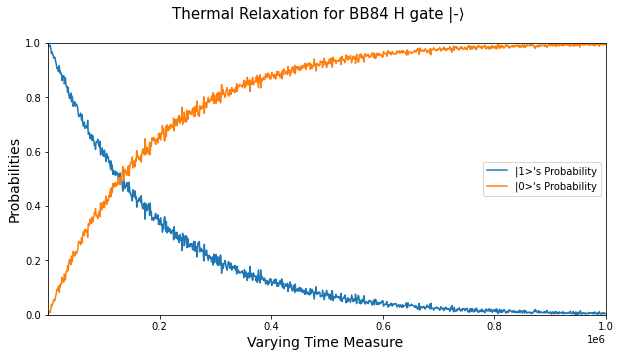

<Figure size 576x360 with 0 Axes>

In [23]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Thermal Relaxation for BB84 H gate |-⟩',fontsize=15)
# naming the x axis
plt.xlabel('Varying Time Measure ',fontsize=14)
# naming the y axis
plt.ylabel('Probabilities',fontsize=14)
# giving a title to my graph
# Set axis ranges; by default this will put major ticks every 25.
#ax.set_xlim(0, 300)
#ax.set_ylim(0, 1)
ax.set_xlim(10, 1000000)
ax.set_ylim(0,1)
fig = plt.figure(figsize=(8,5))
# line 2 points
x1=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000, 124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000, 132000, 133000, 134000, 135000, 136000, 137000, 138000, 139000, 140000, 141000, 142000, 143000, 144000, 145000, 146000, 147000, 148000, 149000, 150000, 151000, 152000, 153000, 154000, 155000, 156000, 157000, 158000, 159000, 160000, 161000, 162000, 163000, 164000, 165000, 166000, 167000, 168000, 169000, 170000, 171000, 172000, 173000, 174000, 175000, 176000, 177000, 178000, 179000, 180000, 181000, 182000, 183000, 184000, 185000, 186000, 187000, 188000, 189000, 190000, 191000, 192000, 193000, 194000, 195000, 196000, 197000, 198000, 199000, 200000, 201000, 202000, 203000, 204000, 205000, 206000, 207000, 208000, 209000, 210000, 211000, 212000, 213000, 214000, 215000, 216000, 217000, 218000, 219000, 220000, 221000, 222000, 223000, 224000, 225000, 226000, 227000, 228000, 229000, 230000, 231000, 232000, 233000, 234000, 235000, 236000, 237000, 238000, 239000, 240000, 241000, 242000, 243000, 244000, 245000, 246000, 247000, 248000, 249000, 250000, 251000, 252000, 253000, 254000, 255000, 256000, 257000, 258000, 259000, 260000, 261000, 262000, 263000, 264000, 265000, 266000, 267000, 268000, 269000, 270000, 271000, 272000, 273000, 274000, 275000, 276000, 277000, 278000, 279000, 280000, 281000, 282000, 283000, 284000, 285000, 286000, 287000, 288000, 289000, 290000, 291000, 292000, 293000, 294000, 295000, 296000, 297000, 298000, 299000, 300000, 301000, 302000, 303000, 304000, 305000, 306000, 307000, 308000, 309000, 310000, 311000, 312000, 313000, 314000, 315000, 316000, 317000, 318000, 319000, 320000, 321000, 322000, 323000, 324000, 325000, 326000, 327000, 328000, 329000, 330000, 331000, 332000, 333000, 334000, 335000, 336000, 337000, 338000, 339000, 340000, 341000, 342000, 343000, 344000, 345000, 346000, 347000, 348000, 349000, 350000, 351000, 352000, 353000, 354000, 355000, 356000, 357000, 358000, 359000, 360000, 361000, 362000, 363000, 364000, 365000, 366000, 367000, 368000, 369000, 370000, 371000, 372000, 373000, 374000, 375000, 376000, 377000, 378000, 379000, 380000, 381000, 382000, 383000, 384000, 385000, 386000, 387000, 388000, 389000, 390000, 391000, 392000, 393000, 394000, 395000, 396000, 397000, 398000, 399000, 400000, 401000, 402000, 403000, 404000, 405000, 406000, 407000, 408000, 409000, 410000, 411000, 412000, 413000, 414000, 415000, 416000, 417000, 418000, 419000, 420000, 421000, 422000, 423000, 424000, 425000, 426000, 427000, 428000, 429000, 430000, 431000, 432000, 433000, 434000, 435000, 436000, 437000, 438000, 439000, 440000, 441000, 442000, 443000, 444000, 445000, 446000, 447000, 448000, 449000, 450000, 451000, 452000, 453000, 454000, 455000, 456000, 457000, 458000, 459000, 460000, 461000, 462000, 463000, 464000, 465000, 466000, 467000, 468000, 469000, 470000, 471000, 472000, 473000, 474000, 475000, 476000, 477000, 478000, 479000, 480000, 481000, 482000, 483000, 484000, 485000, 486000, 487000, 488000, 489000, 490000, 491000, 492000, 493000, 494000, 495000, 496000, 497000, 498000, 499000, 500000, 501000, 502000, 503000, 504000, 505000, 506000, 507000, 508000, 509000, 510000, 511000, 512000, 513000, 514000, 515000, 516000, 517000, 518000, 519000, 520000, 521000, 522000, 523000, 524000, 525000, 526000, 527000, 528000, 529000, 530000, 531000, 532000, 533000, 534000, 535000, 536000, 537000, 538000, 539000, 540000, 541000, 542000, 543000, 544000, 545000, 546000, 547000, 548000, 549000, 550000, 551000, 552000, 553000, 554000, 555000, 556000, 557000, 558000, 559000, 560000, 561000, 562000, 563000, 564000, 565000, 566000, 567000, 568000, 569000, 570000, 571000, 572000, 573000, 574000, 575000, 576000, 577000, 578000, 579000, 580000, 581000, 582000, 583000, 584000, 585000, 586000, 587000, 588000, 589000, 590000, 591000, 592000, 593000, 594000, 595000, 596000, 597000, 598000, 599000, 600000, 601000, 602000, 603000, 604000, 605000, 606000, 607000, 608000, 609000, 610000, 611000, 612000, 613000, 614000, 615000, 616000, 617000, 618000, 619000, 620000, 621000, 622000, 623000, 624000, 625000, 626000, 627000, 628000, 629000, 630000, 631000, 632000, 633000, 634000, 635000, 636000, 637000, 638000, 639000, 640000, 641000, 642000, 643000, 644000, 645000, 646000, 647000, 648000, 649000, 650000, 651000, 652000, 653000, 654000, 655000, 656000, 657000, 658000, 659000, 660000, 661000, 662000, 663000, 664000, 665000, 666000, 667000, 668000, 669000, 670000, 671000, 672000, 673000, 674000, 675000, 676000, 677000, 678000, 679000, 680000, 681000, 682000, 683000, 684000, 685000, 686000, 687000, 688000, 689000, 690000, 691000, 692000, 693000, 694000, 695000, 696000, 697000, 698000, 699000, 700000, 701000, 702000, 703000, 704000, 705000, 706000, 707000, 708000, 709000, 710000, 711000, 712000, 713000, 714000, 715000, 716000, 717000, 718000, 719000, 720000, 721000, 722000, 723000, 724000, 725000, 726000, 727000, 728000, 729000, 730000, 731000, 732000, 733000, 734000, 735000, 736000, 737000, 738000, 739000, 740000, 741000, 742000, 743000, 744000, 745000, 746000, 747000, 748000, 749000, 750000, 751000, 752000, 753000, 754000, 755000, 756000, 757000, 758000, 759000, 760000, 761000, 762000, 763000, 764000, 765000, 766000, 767000, 768000, 769000, 770000, 771000, 772000, 773000, 774000, 775000, 776000, 777000, 778000, 779000, 780000, 781000, 782000, 783000, 784000, 785000, 786000, 787000, 788000, 789000, 790000, 791000, 792000, 793000, 794000, 795000, 796000, 797000, 798000, 799000, 800000, 801000, 802000, 803000, 804000, 805000, 806000, 807000, 808000, 809000, 810000, 811000, 812000, 813000, 814000, 815000, 816000, 817000, 818000, 819000, 820000, 821000, 822000, 823000, 824000, 825000, 826000, 827000, 828000, 829000, 830000, 831000, 832000, 833000, 834000, 835000, 836000, 837000, 838000, 839000, 840000, 841000, 842000, 843000, 844000, 845000, 846000, 847000, 848000, 849000, 850000, 851000, 852000, 853000, 854000, 855000, 856000, 857000, 858000, 859000, 860000, 861000, 862000, 863000, 864000, 865000, 866000, 867000, 868000, 869000, 870000, 871000, 872000, 873000, 874000, 875000, 876000, 877000, 878000, 879000, 880000, 881000, 882000, 883000, 884000, 885000, 886000, 887000, 888000, 889000, 890000, 891000, 892000, 893000, 894000, 895000, 896000, 897000, 898000, 899000, 900000, 901000, 902000, 903000, 904000, 905000, 906000, 907000, 908000, 909000, 910000, 911000, 912000, 913000, 914000, 915000, 916000, 917000, 918000, 919000, 920000, 921000, 922000, 923000, 924000, 925000, 926000, 927000, 928000, 929000, 930000, 931000, 932000, 933000, 934000, 935000, 936000, 937000, 938000, 939000, 940000, 941000, 942000, 943000, 944000, 945000, 946000, 947000, 948000, 949000, 950000, 951000, 952000, 953000, 954000, 955000, 956000, 957000, 958000, 959000, 960000, 961000, 962000, 963000, 964000, 965000, 966000, 967000, 968000, 969000, 970000, 971000, 972000, 973000, 974000, 975000, 976000, 977000, 978000, 979000, 980000, 981000, 982000, 983000, 984000, 985000, 986000, 987000, 988000, 989000, 990000, 991000, 992000, 993000, 994000, 995000, 996000, 997000, 998000, 999000, 1000000]
x2=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000, 124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000, 132000, 133000, 134000, 135000, 136000, 137000, 138000, 139000, 140000, 141000, 142000, 143000, 144000, 145000, 146000, 147000, 148000, 149000, 150000, 151000, 152000, 153000, 154000, 155000, 156000, 157000, 158000, 159000, 160000, 161000, 162000, 163000, 164000, 165000, 166000, 167000, 168000, 169000, 170000, 171000, 172000, 173000, 174000, 175000, 176000, 177000, 178000, 179000, 180000, 181000, 182000, 183000, 184000, 185000, 186000, 187000, 188000, 189000, 190000, 191000, 192000, 193000, 194000, 195000, 196000, 197000, 198000, 199000, 200000, 201000, 202000, 203000, 204000, 205000, 206000, 207000, 208000, 209000, 210000, 211000, 212000, 213000, 214000, 215000, 216000, 217000, 218000, 219000, 220000, 221000, 222000, 223000, 224000, 225000, 226000, 227000, 228000, 229000, 230000, 231000, 232000, 233000, 234000, 235000, 236000, 237000, 238000, 239000, 240000, 241000, 242000, 243000, 244000, 245000, 246000, 247000, 248000, 249000, 250000, 251000, 252000, 253000, 254000, 255000, 256000, 257000, 258000, 259000, 260000, 261000, 262000, 263000, 264000, 265000, 266000, 267000, 268000, 269000, 270000, 271000, 272000, 273000, 274000, 275000, 276000, 277000, 278000, 279000, 280000, 281000, 282000, 283000, 284000, 285000, 286000, 287000, 288000, 289000, 290000, 291000, 292000, 293000, 294000, 295000, 296000, 297000, 298000, 299000, 300000, 301000, 302000, 303000, 304000, 305000, 306000, 307000, 308000, 309000, 310000, 311000, 312000, 313000, 314000, 315000, 316000, 317000, 318000, 319000, 320000, 321000, 322000, 323000, 324000, 325000, 326000, 327000, 328000, 329000, 330000, 331000, 332000, 333000, 334000, 335000, 336000, 337000, 338000, 339000, 340000, 341000, 342000, 343000, 344000, 345000, 346000, 347000, 348000, 349000, 350000, 351000, 352000, 353000, 354000, 355000, 356000, 357000, 358000, 359000, 360000, 361000, 362000, 363000, 364000, 365000, 366000, 367000, 368000, 369000, 370000, 371000, 372000, 373000, 374000, 375000, 376000, 377000, 378000, 379000, 380000, 381000, 382000, 383000, 384000, 385000, 386000, 387000, 388000, 389000, 390000, 391000, 392000, 393000, 394000, 395000, 396000, 397000, 398000, 399000, 400000, 401000, 402000, 403000, 404000, 405000, 406000, 407000, 408000, 409000, 410000, 411000, 412000, 413000, 414000, 415000, 416000, 417000, 418000, 419000, 420000, 421000, 422000, 423000, 424000, 425000, 426000, 427000, 428000, 429000, 430000, 431000, 432000, 433000, 434000, 435000, 436000, 437000, 438000, 439000, 440000, 441000, 442000, 443000, 444000, 445000, 446000, 447000, 448000, 449000, 450000, 451000, 452000, 453000, 454000, 455000, 456000, 457000, 458000, 459000, 460000, 461000, 462000, 463000, 464000, 465000, 466000, 467000, 468000, 469000, 470000, 471000, 472000, 473000, 474000, 475000, 476000, 477000, 478000, 479000, 480000, 481000, 482000, 483000, 484000, 485000, 486000, 487000, 488000, 489000, 490000, 491000, 492000, 493000, 494000, 495000, 496000, 497000, 498000, 499000, 500000, 501000, 502000, 503000, 504000, 505000, 506000, 507000, 508000, 509000, 510000, 511000, 512000, 513000, 514000, 515000, 516000, 517000, 518000, 519000, 520000, 521000, 522000, 523000, 524000, 525000, 526000, 527000, 528000, 529000, 530000, 531000, 532000, 533000, 534000, 535000, 536000, 537000, 538000, 539000, 540000, 541000, 542000, 543000, 544000, 545000, 546000, 547000, 548000, 549000, 550000, 551000, 552000, 553000, 554000, 555000, 556000, 557000, 558000, 559000, 560000, 561000, 562000, 563000, 564000, 565000, 566000, 567000, 568000, 569000, 570000, 571000, 572000, 573000, 574000, 575000, 576000, 577000, 578000, 579000, 580000, 581000, 582000, 583000, 584000, 585000, 586000, 587000, 588000, 589000, 590000, 591000, 592000, 593000, 594000, 595000, 596000, 597000, 598000, 599000, 600000, 601000, 602000, 603000, 604000, 605000, 606000, 607000, 608000, 609000, 610000, 611000, 612000, 613000, 614000, 615000, 616000, 617000, 618000, 619000, 620000, 621000, 622000, 623000, 624000, 625000, 626000, 627000, 628000, 629000, 630000, 631000, 632000, 633000, 634000, 635000, 636000, 637000, 638000, 639000, 640000, 641000, 642000, 643000, 644000, 645000, 646000, 647000, 648000, 649000, 650000, 651000, 652000, 653000, 654000, 655000, 656000, 657000, 658000, 659000, 660000, 661000, 662000, 663000, 664000, 665000, 666000, 667000, 668000, 669000, 670000, 671000, 672000, 673000, 674000, 675000, 676000, 677000, 678000, 679000, 680000, 681000, 682000, 683000, 684000, 685000, 686000, 687000, 688000, 689000, 690000, 691000, 692000, 693000, 694000, 695000, 696000, 697000, 698000, 699000, 700000, 701000, 702000, 703000, 704000, 705000, 706000, 707000, 708000, 709000, 710000, 711000, 712000, 713000, 714000, 715000, 716000, 717000, 718000, 719000, 720000, 721000, 722000, 723000, 724000, 725000, 726000, 727000, 728000, 729000, 730000, 731000, 732000, 733000, 734000, 735000, 736000, 737000, 738000, 739000, 740000, 741000, 742000, 743000, 744000, 745000, 746000, 747000, 748000, 749000, 750000, 751000, 752000, 753000, 754000, 755000, 756000, 757000, 758000, 759000, 760000, 761000, 762000, 763000, 764000, 765000, 766000, 767000, 768000, 769000, 770000, 771000, 772000, 773000, 774000, 775000, 776000, 777000, 778000, 779000, 780000, 781000, 782000, 783000, 784000, 785000, 786000, 787000, 788000, 789000, 790000, 791000, 792000, 793000, 794000, 795000, 796000, 797000, 798000, 799000, 800000, 801000, 802000, 803000, 804000, 805000, 806000, 807000, 808000, 809000, 810000, 811000, 812000, 813000, 814000, 815000, 816000, 817000, 818000, 819000, 820000, 821000, 822000, 823000, 824000, 825000, 826000, 827000, 828000, 829000, 830000, 831000, 832000, 833000, 834000, 835000, 836000, 837000, 838000, 839000, 840000, 841000, 842000, 843000, 844000, 845000, 846000, 847000, 848000, 849000, 850000, 851000, 852000, 853000, 854000, 855000, 856000, 857000, 858000, 859000, 860000, 861000, 862000, 863000, 864000, 865000, 866000, 867000, 868000, 869000, 870000, 871000, 872000, 873000, 874000, 875000, 876000, 877000, 878000, 879000, 880000, 881000, 882000, 883000, 884000, 885000, 886000, 887000, 888000, 889000, 890000, 891000, 892000, 893000, 894000, 895000, 896000, 897000, 898000, 899000, 900000, 901000, 902000, 903000, 904000, 905000, 906000, 907000, 908000, 909000, 910000, 911000, 912000, 913000, 914000, 915000, 916000, 917000, 918000, 919000, 920000, 921000, 922000, 923000, 924000, 925000, 926000, 927000, 928000, 929000, 930000, 931000, 932000, 933000, 934000, 935000, 936000, 937000, 938000, 939000, 940000, 941000, 942000, 943000, 944000, 945000, 946000, 947000, 948000, 949000, 950000, 951000, 952000, 953000, 954000, 955000, 956000, 957000, 958000, 959000, 960000, 961000, 962000, 963000, 964000, 965000, 966000, 967000, 968000, 969000, 970000, 971000, 972000, 973000, 974000, 975000, 976000, 977000, 978000, 979000, 980000, 981000, 982000, 983000, 984000, 985000, 986000, 987000, 988000, 989000, 990000, 991000, 992000, 993000, 994000, 995000, 996000, 997000, 998000, 999000, 1000000]

#plotting the line 2 points
ax.plot(x1, y1, label = "|1>'s Probability")
ax.plot(x2, y2, label = "|0>'s Probability")

#ax.axes.xaxis.set_ticks([])
# show a legend on the plot
ax.legend()